In [224]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [226]:
# Load datasets
train = pd.read_csv('train_GzS76OK\\train.csv')
fulfillment_info = pd.read_csv("train_GzS76OK\\fulfilment_center_info.csv")
meal_info = pd.read_csv("train_GzS76OK\\meal_info.csv")


# Merging datasets to create train Data

In [229]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [231]:
fulfillment_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [233]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [234]:
# Merge train with fulfillment_info on center_id
train_full = pd.merge(train, fulfillment_info, on="center_id", how="left")
train_full.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [237]:
# Merge the result(train_full) with meal_info on meal_id
final_df = pd.merge(train_full, meal_info, on="meal_id", how="left")
final_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [239]:
#final_df.to_csv('final_df.csv') # Save file as final_df.csv

In [241]:
final_df.shape

(456548, 15)

In [243]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [245]:
final_df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [247]:
final_df.describe(include= 'object')

,center_type,category,cuisine
count,456548,456548,456548
unique,3,14,4
top,TYPE_A,Beverages,Italian
freq,262881,127890,122925


In [249]:
final_df.isnull().sum()/final_df.shape[0]*100

id                       0.0
week                     0.0
center_id                0.0
meal_id                  0.0
checkout_price           0.0
base_price               0.0
emailer_for_promotion    0.0
homepage_featured        0.0
num_orders               0.0
city_code                0.0
region_code              0.0
center_type              0.0
op_area                  0.0
category                 0.0
cuisine                  0.0
dtype: float64

#### No null values in train data

In [252]:
final_df = final_df.drop(axis=1,columns=['id','city_code', 'region_code','op_area','center_type','center_type','category','cuisine']) # Dropping 'id'column and columns (except target) that are not present in test data
final_df.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1,55,1885,136.83,152.29,0,0,177
1,1,55,1993,136.83,135.83,0,0,270
2,1,55,2539,134.86,135.86,0,0,189
3,1,55,2139,339.50,437.53,0,0,54
4,1,55,2631,243.50,242.50,0,0,40


In [254]:
final_df.shape

(456548, 8)

In [256]:
#final_df.to_csv('features_n_target.csv') # Save file as features_n_target.csv

In [258]:
#final_df = pd.get_dummies(final_df, columns=["center_type", "category", "cuisine"], drop_first=True, dtype=int) #Encoding

In [260]:
final_df.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [262]:
# sns.pairplot(data=final_df)
# plt.show()

<Axes: >

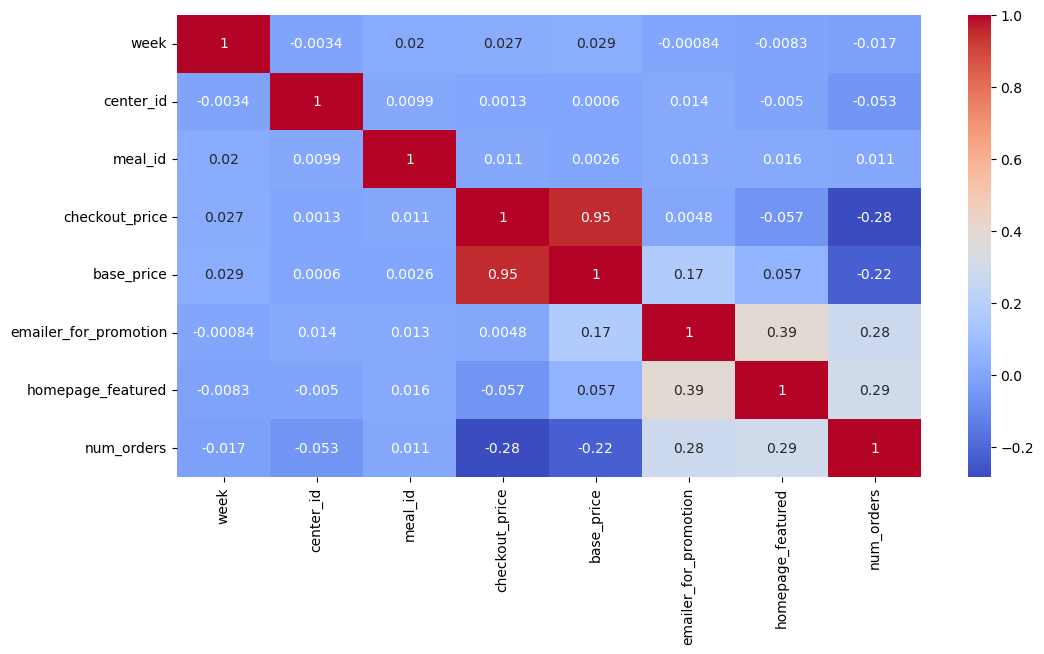

In [264]:
plt.figure(figsize=(12,6))
sns.heatmap(final_df.corr(),annot=True,cmap='coolwarm')

# Histogram of numeric columns

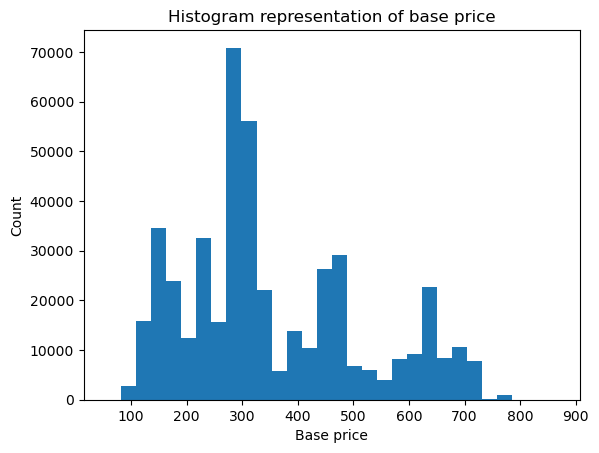

In [266]:
plt.hist(final_df['base_price'],bins=30)
plt.title('Histogram representation of base price')
plt.xlabel('Base price')
plt.ylabel('Count')
plt.show()

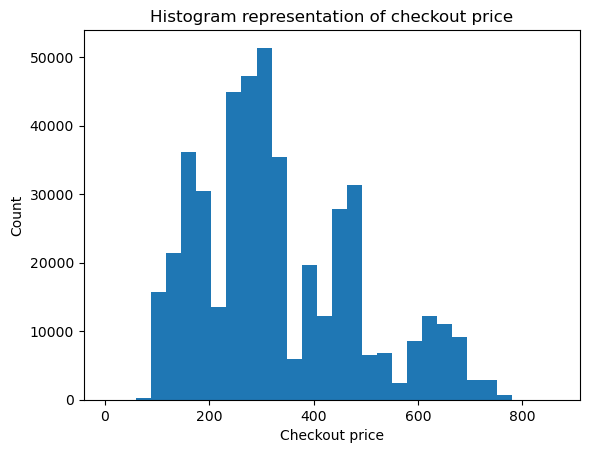

In [268]:
plt.hist(final_df['checkout_price'],bins=30)
plt.title('Histogram representation of checkout price')
plt.xlabel('Checkout price')
plt.ylabel('Count')
plt.show()

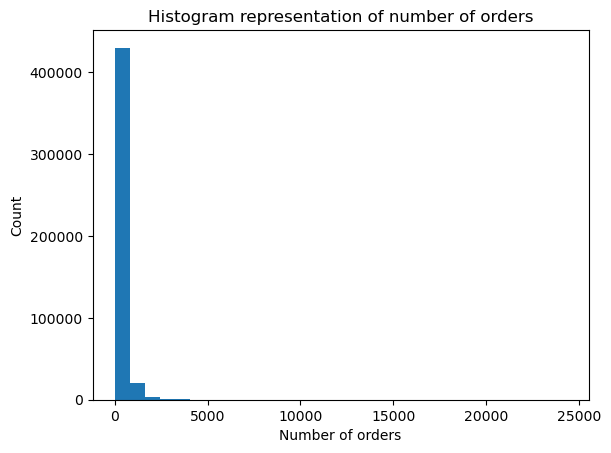

In [270]:
plt.hist(final_df['num_orders'],bins=30)
plt.title('Histogram representation of number of orders')
plt.xlabel('Number of orders')
plt.ylabel('Count')
plt.show()

In [271]:
# if (final_df['num_orders']<0):
#     final_df['num_orders']= final_df['num_orders']*-1
# else:
#     exit
# final_df['num_orders']
a=pd.DataFrame(final_df['num_orders']<0)
a.value_counts()


num_orders
False         456548
Name: count, dtype: int64

# Loading and analyzing test data

In [276]:
test_df=pd.read_csv("test_QoiMO9B.csv")
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [278]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [280]:
test_df.isnull().sum()/test_df.shape[0]*100

id                       0.0
week                     0.0
center_id                0.0
meal_id                  0.0
checkout_price           0.0
base_price               0.0
emailer_for_promotion    0.0
homepage_featured        0.0
dtype: float64

In [282]:
X_train = final_df.drop(columns=["num_orders"])  # Features
X_test = test_df.drop(columns=["id"])
y_train = final_df["num_orders"]

### Scaling

In [286]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

### Machine Learning Model

In [289]:
from sklearn.linear_model import LinearRegression

In [291]:
model= LinearRegression()

In [293]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [295]:
y_pred= model.predict(X_test_scaled)

In [297]:
# Convert y_pred (predictions) to a DataFrame
test_df['num_orders'] = y_pred
display(test_df[['id','num_orders']])
test_df[['id','num_orders']].to_csv('result.csv',index=False) # Save file as result.csv


,id,num_orders
0,1028232,398.900289
1,1127204,398.875001
2,1212707,402.310709
3,1082698,400.576895
4,1400926,392.824610
...,...,...
32568,1250239,199.724487
32569,1039516,203.415142
32570,1158107,296.066844
32571,1444235,295.608648


In [299]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.ensemble import HistGradientBoostingRegressor

In [301]:
# lr= LinearRegression()
# dtr= DecisionTreeRegressor()
# rfr= RandomForestRegressor()
# svr= SVR(C=1.0, epsilon=0.2)
# hgbr=HistGradientBoostingRegressor()

In [303]:
# lr.fit(X_train_scaled,y_train)
# dtr.fit(X_train_scaled,y_train)
# rfr.fit(X_train_scaled,y_train)
# svr.fit(X_train_scaled,y_train)
# hgbr.fit(X_train_scaled,y_train)

In [181]:
# lr_y_pred= lr.predict(X_test_scaled)
# dtr_y_pred= dtr.predict(X_test_scaled)
# rfr_y_pred= rfr.predict(X_test_scaled)
# svr_y_pred= svr.predict(X_test_scaled)
# hgbr_y_pred= hgbr.predict(X_test_scaled)

In [182]:
# # Convert lr_y_pred (predictions) to a DataFrame
# test_df['num_orders'] = lr_y_pred
# display(test_df[['id','num_orders']])
# test_df[['id','num_orders']].to_csv('lr_result.csv',index=False) # Save file 

# # Convert dtr_y_pred (predictions) to a DataFrame
# test_df['num_orders'] = dtr_y_pred
# display(test_df[['id','num_orders']])
# test_df[['id','num_orders']].to_csv('dtr_result.csv',index=False) # Save file

# # Convert rfr_y_pred (predictions) to a DataFrame
# test_df['num_orders'] = rfr_y_pred
# display(test_df[['id','num_orders']])
# test_df[['id','num_orders']].to_csv('rfr_result.csv',index=False) # Save file

# # Convert dtr_y_pred (predictions) to a DataFrame
# test_df['num_orders'] = svr_y_pred
# display(test_df[['id','num_orders']])
# test_df[['id','num_orders']].to_csv('svr_result.csv',index=False) # Save file 

# # Convert hgbr_y_pred (predictions) to a DataFrame
# test_df['num_orders'] = hgbr_y_pred
# display(test_df[['id','num_orders']])
# test_df[['id','num_orders']].to_csv('hgbr_result.csv',index=False) # Save file